In [ ]:
#| default_exp index

In [ ]:
#| hide
#| export
import pandas as pd
import numpy as np
# from cylinder.demand import load_demand
# from cylinder.power import load_power
from cylinder.hwc import HWC
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pathlib import Path

This file will become your README and also the index of your documentation.

## Install

```sh
pip install cylinder
```

This basic model provides the core function for a step change calculation in a mixed hot water cylinder

## How to use

Load some data that can be used to test the model - flow and electricity pricing

In [ ]:
# df = (pd.DataFrame(load_demand(path = Path('../data/drawprofiles'),bed=5,unit=4)))
# df.columns=["flow"]
# df = df.merge(load_power(path = Path('../data')), how='left', left_index=True, right_index=True)
# df.head()

Create a hot water cylinder object and initialise it with the data 

In [ ]:
hwc = HWC(T_set=70, T_deadband=2, element=3, radius=.2, height=1.5)

In [ ]:
print(f'The HWC volume is {int(hwc.volume*1000)} liters')
print(f'The HWC surface area is {hwc.surface_area:.2f} m2')
print(f'The HWC has a {hwc.element:.2f} kW element')


The HWC volume is 188 liters
The HWC surface area is 2.14 m2
The HWC has a 3.00 kW element


Default thermogram 

Run the model for a single day on thermostat and plot the results

In [ ]:
hwc = HWC(T_set=55, T_deadband=1.2, element=3, radius=.2, height=1.5)

Text(0.5, 0.98, 'No Heating + Flow rate of 10 litres per minure for 10 minutes')

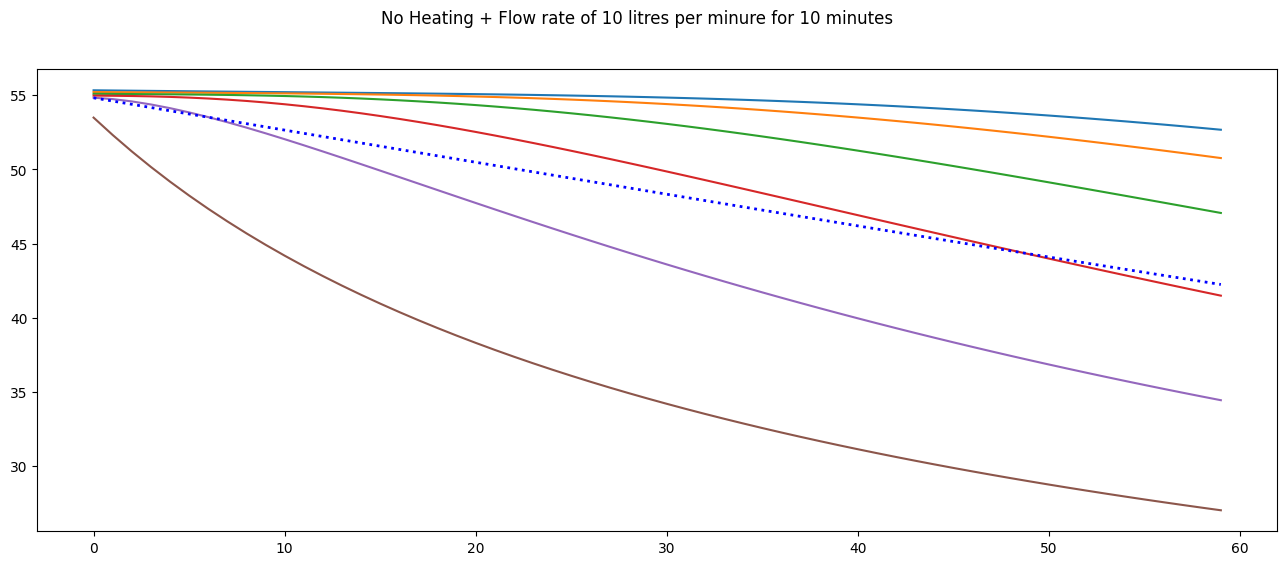

In [ ]:
env = HWC(T_set=55, element=3, delta=10000, nodes=6)
shower = .31 # 10 litres per minute
temp = []
for step in range(60):
    action = 0 #np.random.randint(0,2)
    env._update_model(action = action , flow = shower )#if step < 10 else 0)
    temp.append(env.temperatures)

fig, ax = plt.subplots(figsize=(16,6))
ax.plot(np.vstack(temp))
ax.plot(np.vstack(temp).mean(axis=1), lw=2, ls=':', c='blue')

fig.suptitle('No Heating + Flow rate of 10 litres per minure for 10 minutes')

In [ ]:
# fig, ax = plt.subplots(nrows=2, figsize=(12,6), sharex=True)
# ax[0].plot(results.temperature)
# # ax[1].plot(results['flow']*100)
# ax[0].set_ylabel('°C')
# ax[0].set_title('Temperature')
# ax[1].plot(results['thermostat'])
# ax[1].xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
# ax[1].xaxis.set_minor_formatter(mdates.DateFormatter("%H:%M"))

In [ ]:
# print(f'The element was on for {results.thermostat.sum()} minutes.')
# print(f'Power consumption was {results.thermostat.sum()/60*hwc.element:.2f} kWh.')

The element was on for 129 minutes.
Power consumption was 6.45 kWh.


# Passive Cooling